In [41]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 
import os
from scipy.stats import linregress

## 48q

In [1]:
def file_reader_ldpc(fname_in,Nq,repeat,even_odd):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d.npz" % (i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            if even_odd == "odd":
                succ_prob_word, succ_prob, p_list, Nrep = npz_file['succ_prob_word_X'], npz_file['succ_prob_X'],  npz_file['p_list'], npz_file['Nrep']
            else:
                succ_prob_word, succ_prob, p_list, Nrep = npz_file['succ_prob_word_Z'], npz_file['succ_prob_Z'],  npz_file['p_list'], npz_file['Nrep']

            if first :
                first = False
                succ_prob_avg = np.zeros((len(p_list),Nq))
                succ_prob_word_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            succ_prob_word_avg += succ_prob_word*Nrep
            Ntot += Nrep
    if not first:    
        return succ_prob_avg/Ntot, succ_prob_word_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0,0

η_r=0.85
unit_dist =  [0.54459843 1.17405479 1.82230365 2.49050173 3.17991595 3.89193791
 4.62810075 5.39009908 6.17981244 6.99933325 7.85100021 8.73743856]
slope_dB =  [0.00187913 0.00295505 0.00563455 0.01040706 0.01920424 0.03462742
 0.05908798 0.09290637 0.14234668 0.20005157 0.27832099 0.35227269]
std_err_dB =  [0.00031397 0.00014655 0.00014766 0.00014684 0.00020379 0.00030514
 0.00024566 0.00049346 0.00039923 0.00095336 0.00371489 0.00656217]


/tmp/ipykernel_23837/4129591049.py:35: RuntimeWarning: divide by zero encountered in true_divide
  slope_dB = 0.2*slope/np.log10((1-p_list[ind_p_list])/(1-p_r))
/tmp/ipykernel_23837/4129591049.py:36: RuntimeWarning: divide by zero encountered in true_divide
  std_err_dB = -0.2*std_err/np.log10((1-p_list[ind_p_list])/(1-p_r))


η_r=0.90
unit_dist =  [0.57909363 1.17405479 1.78577761 2.41523398 3.06348284 3.73168091
 4.42109514 5.13311709 5.86927994 6.63127826 7.42099162 8.24051243
 9.0921794  9.97861775]
slope_dB =  [6.00387900e-05 1.89082012e-04 5.32175631e-04 1.31360620e-03
 3.03152366e-03 6.39685123e-03 1.30197902e-02 2.40253351e-02
 4.28779268e-02 6.87881825e-02 1.04094218e-01 1.48930488e-01
 2.14141730e-01 2.80229130e-01]
std_err_dB =  [9.77151433e-05 5.15052051e-05 4.75838726e-05 5.87121954e-05
 8.44655344e-05 8.63368581e-05 5.58168019e-05 1.15718890e-04
 2.31906265e-04 3.89807695e-04 5.43989557e-04 1.01873556e-03
 1.74736376e-03 3.70342808e-03]
η_r=0.95
unit_dist =  [ 1.17405479  1.75314842  2.34810958  2.95983241  3.58928877  4.23753763
  4.90573571  5.59514993  6.30717189  7.04333473  7.80533306  8.59504642
  9.41456722 10.26623419 11.15267254]
slope_dB =  [9.34852858e-06 2.11693495e-05 1.11207301e-04 3.24473348e-04
 8.59457370e-04 2.14426030e-03 4.90207389e-03 9.76536204e-03
 1.86305702e-02 3.211063

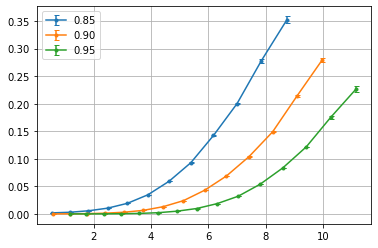

In [888]:
repeat = 200
pr_list = [0.15,0.1,0.05]
Nl_small = np.arange(2,9)
Nl_large =  np.arange(12,30,4)
Nl_list = np.concatenate((Nl_small,Nl_large))
ind_p_list = np.arange(0,15,1)#
# ind_p_list = [8]

# plt.figure(1,figsize=(6,4))
bdy = True
for p_r in pr_list:
    succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))
    for i_L, Nl in enumerate(Nl_list):
        # print(Nl)
        f1 = "data_48q/" + "even_Nl_%d" % (Nl)
        succ_prob_even,_, p_list_even, Ntot_even = file_reader_ldpc(f1,6,repeat,"even") 
        succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)[0,:],:]

        f2 = "data_48q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
        succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
        succ_prob_avg[:,i_L] = np.mean( succ_prob_odd[ind_p_list,:]*succ_prob_repeater ,axis=1)

    slope = np.zeros(len(ind_p_list))
    intercept = np.zeros(len(ind_p_list))
    std_err = np.zeros(len(ind_p_list))

    for i_p, ind_p in enumerate(ind_p_list):
        if i_p>= 10:
            i_N = np.arange(len(Nl_list)-i_p+9)
        else:
            i_N = np.arange(len(Nl_list))
        i_s = np.argwhere(succ_prob_avg[i_p,i_N]>0)[:,0]
        slope[i_p], intercept[i_p], r_value, p_value, std_err[i_p] = linregress(Nl_list[i_s], np.log10(succ_prob_avg[i_p,i_s]))
        
    slope_dB = 0.2*slope/np.log10((1-p_list[ind_p_list])/(1-p_r))
    std_err_dB = -0.2*std_err/np.log10((1-p_list[ind_p_list])/(1-p_r))
    unit_dist = -50*np.log10((1-p_list[ind_p_list])/(1-p_r))
    inds = np.argwhere(unit_dist>0)[:,0]
    plt.figure(2)
    print("η_r=%.2f" % (1-p_r))
    print("unit_dist = ", unit_dist[inds])
    print("slope_dB = ",slope_dB[inds])
    print("std_err_dB = ", std_err_dB[inds])
    plt.errorbar(unit_dist[inds],slope_dB[inds],std_err_dB[inds],marker=".",markersize=6,capsize=2.5,label="%.2f" % (1-p_r))
    # plt.errorbar(p_list[ind_p_list][inds],slope_dB[inds],std_err_dB[inds],marker=".",markersize=8,capsize=4,label="%.2f" % (1-p_r))
    # plt.errorbar(p_list[ind_p_list],slope_dB,std_err_dB,marker=".",markersize=8,capsize=4,label="%.2f" % (1-p_r))

    # plt.ylim(-0.001,0.01)
plt.grid()
plt.legend()

In [895]:
repeat = 200
p_r = 0.05
Nl_small = np.arange(2,9)
Nl_large =  np.arange(12,30,4)
Nl_list = np.concatenate((Nl_small,Nl_large))
# Nl_list = np.arange(2,6,1)
ind_p_list = np.arange(0,15,1)#[8,11,14]
# ind_p_list = [8]
succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))

# plt.figure(1,figsize=(6,4))
bdy = True
for i_L, Nl in enumerate(Nl_list):
    # print(Nl)
    f1 = "data_48q/" + "even_Nl_%d" % (Nl)
    succ_prob_even,_, p_list_even, Ntot_even = file_reader_ldpc(f1,6,repeat,"even") 
    succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)[0,:],:]
    # plt.plot(1-p_list_even,succ_prob_even,".", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        
    f2 = "data_48q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
    # succ_prob_avg[:,i_L] = (np.mean(succ_prob_odd,axis=1))[ind_p_list]#*np.mean(succ_prob_repeater,axis=1)
    succ_prob_avg[:,i_L] = np.mean( succ_prob_odd[ind_p_list,:]*succ_prob_repeater ,axis=1)


In [206]:

# d_list = [40]#np.linspace(10,200,10)
# cost = np.zeros((len(ind_p_list),len(d_list)))
# unit_dist = np.zeros(len(ind_p_list))

# for i_d, d_tot in enumerate(d_list):
#     for i_p, ind_p in enumerate(ind_p_list):
#         unit_dist[i_p] = -50*np.log10((1-p_list[ind_p])/(1-p_r))
#         if unit_dist[i_p]>0:
#             cost_vec = 1/(unit_dist[i_p]*succ_prob_avg[i_p,:])
#             cost[i_p,i_d] = np.interp(d_tot,Nl_list*unit_dist[i_p], cost_vec)
#             plt.figure(1)
#             plt.plot(Nl_list*unit_dist[i_p], cost_vec,color="C%d")
#             # plt.plot([d_tot,d_tot],[0,5],"k--")
#             plt.plot(d_tot,cost[i_p,i_d],"*")
#             plt.ylim(0.1,10)
#     i_dist = np.argwhere(unit_dist>0)[:,0]
#     plt.figure(2)
#     plt.plot(unit_dist[i_dist],cost[i_dist,i_d],"o-",label='d=%d km' % d_tot)

# plt.legend()
# plt.ylim(0.1,5)
# plt.xlim()
# plt.xlabel("QR dist[km]")
# plt.show()
1-p_list[ind_p_list]

array([0.78157895])

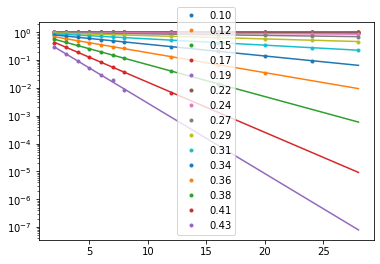

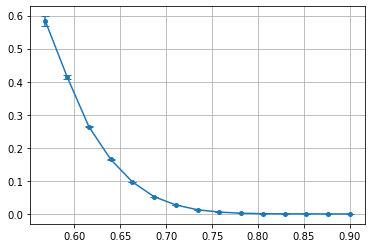

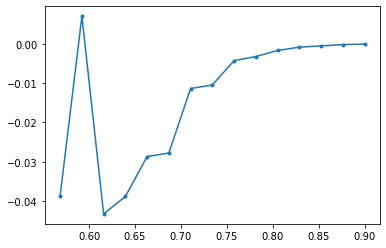

In [896]:

slope = np.zeros(len(ind_p_list))
intercept = np.zeros(len(ind_p_list))
std_err = np.zeros(len(ind_p_list))

for i_p, ind_p in enumerate(ind_p_list):
    if i_p>= 10:
        i_N = np.arange(len(Nl_list)-i_p+9)
    else:
        i_N = np.arange(len(Nl_list))
    i_s = np.argwhere(succ_prob_avg[i_p,i_N]>0)[:,0]
    slope[i_p], intercept[i_p], r_value, p_value, std_err[i_p] = linregress(Nl_list[i_s], np.log(succ_prob_avg[i_p,i_s]))
    plt.figure(1)
    plt.plot(Nl_list[i_N],succ_prob_avg[i_p,i_N],".",color="C%d" % i_p,label="%.2f" % p_list[ind_p])
    plt.plot(Nl_list, np.exp(intercept[i_p]+slope[i_p]*Nl_list),color="C%d" % i_p)
plt.yscale("log")
plt.legend()

plt.figure(2)
plt.errorbar(1-p_list[ind_p_list],-slope,std_err,marker=".",markersize=8,capsize=4)
# plt.ylim(-0.001,0.01)
plt.grid()
plt.show()


plt.figure(3)
plt.plot(1-p_list[ind_p_list],intercept,".-")
plt.show()

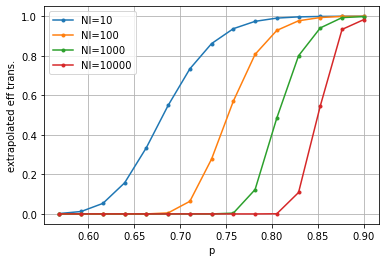

In [815]:
N_sw = [10,100,1e3,1e4]#np.arange(2,1e4)
succ_prob_N = np.zeros((len(N_sw),len(ind_p_list)))
for i_N, Nl in enumerate(N_sw):        
    succ_prob_N[i_N,:] = np.exp(intercept+slope*(1+Nl))
    plt.plot(1-p_list[ind_p_list],succ_prob_N[i_N,:],".-",label="Nl=%d" % Nl)
    
plt.legend()
plt.grid()
plt.xlabel("p")
plt.ylabel("extrapolated eff trans.")
plt.show()


## interpolate large N

/tmp/ipykernel_23837/279193443.py:21: RuntimeWarning: overflow encountered in double_scalars
  cost[i_N] = Nl/d_tot/p_eff[i_N]
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_23837/279193443.py:21: RuntimeWarning: overflow encountered in double_scalars
  cost[i_N] = Nl/d_tot/p_eff[i_N]
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_23837/279193443.py:21: RuntimeWarning: overflow encountered in double_scalars
  cost[i_N] = Nl/d_tot/p_eff[i_N]
/tmp/ipykernel_23837/279193443.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  cost[i_N] = Nl/d_tot/p_eff[i_N]
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/tmp/ipykernel_

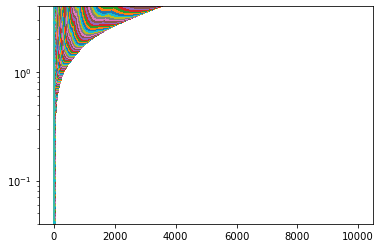

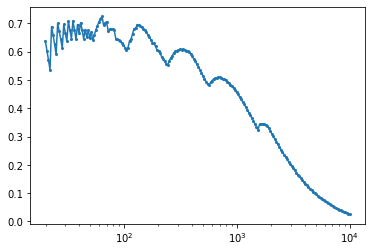

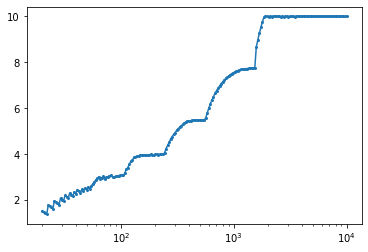

In [893]:
d_list = np.logspace(1.3,4,200)
cost = np.zeros((len(ind_p_list),len(d_list)))
unit_dist = np.zeros(len(ind_p_list))

Nl_opt = np.zeros(len(d_list))
p_opt = np.zeros(len(d_list))

N_sw = np.arange(2,1e4)
succ_prob_N = np.zeros((len(N_sw),len(ind_p_list)))
for i_N, Nl in enumerate(N_sw):        
    succ_prob_N[i_N,:] = np.exp(intercept+slope*(1+Nl))

for i_d, d_tot in enumerate(d_list):
    # print(d_tot)
    
    cost = np.zeros(len(N_sw))
    p_eff = np.zeros(len(N_sw))
    p_val = 1-(1-p_r)*10**(-0.02*d_tot/(N_sw+1))
    for i_N, Nl in enumerate(N_sw):        
        p_eff[i_N] = np.interp(p_val[i_N],p_list[ind_p_list], succ_prob_N[i_N,:])
        cost[i_N] = Nl/d_tot/p_eff[i_N]
        
    plt.figure(1)
    plt.plot(N_sw,cost,".-",label="%d" % d_tot,markersize=4)
    plt.ylim(4e-2,4e0)
    plt.yscale("log")

    i_1 = len(N_sw)-1-np.argwhere(np.diff(cost[::-1])>0)
    # print(i_1)
    if len(i_1)>0:
        Nl_opt[i_d] = N_sw[i_1[0,0]]
        p_opt[i_d] = p_eff[i_1[0,0]]
        if 10/(d_tot/Nl_opt[i_d])> 10:
            Nl_opt[i_d] = int(d_tot)
            p_opt[i_d] = p_eff[np.argwhere(N_sw==int(d_tot))]
    else:
        Nl_opt[i_d] = N_sw[0]
        p_opt[i_d] = p_eff[0]

# plt.legend()
# # plt.xlim()
# # plt.xlabel("QR dist[km]")
# plt.show()

plt.figure(2)
plt.plot(d_list,p_opt,".-",markersize=4)
plt.xscale("log")
# plt.ylim(0,1)
plt.show()

plt.figure(3)
plt.plot(d_list,10/(d_list/Nl_opt),".-",markersize=4)
# plt.plot(d_list,Nl_opt,".-",markersize=4)
plt.xscale("log")
plt.show()
# print(Nl_opt)

## interpolate slope

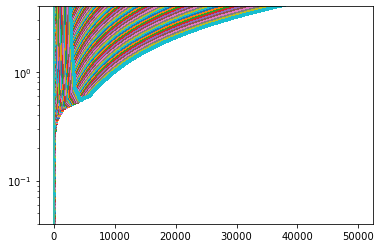

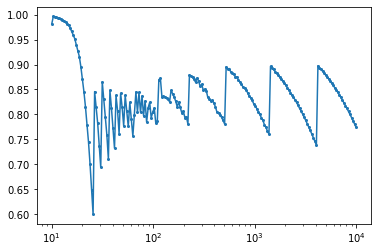

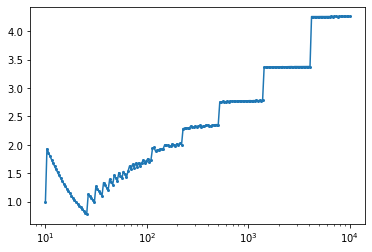

In [897]:
d_list = np.logspace(1,4,200) #10**np.linspace(1.5,2,5)#
cost = np.zeros((len(ind_p_list),len(d_list)))
unit_dist = np.zeros(len(ind_p_list))

Nl_opt = np.zeros(len(d_list))
p_opt = np.zeros(len(d_list))

for i_d, d_tot in enumerate(d_list):
    # print(d_tot)
    if d_tot>10:
        N_sw = np.arange(2,(d_tot/4)*20)
    else:
        N_sw = np.arange(1,20)#(d_tot/4)*10)
    cost = np.zeros(len(N_sw))
    p_eff = np.zeros(len(N_sw))
    p_val = 1-(1-p_r)*10**(-0.02*d_tot/(N_sw+1))
    # if Nl== 2000:
    #     print(1-p_val)
    slope_val = np.interp(p_val,p_list[ind_p_list], slope)
    intercept_val = np.interp(p_val,p_list[ind_p_list], intercept)
    for i_N, Nl in enumerate(N_sw):
        p_eff[i_N] = np.exp(intercept_val[i_N]+slope_val[i_N]*(1+Nl))
        cost[i_N] = Nl/d_tot/p_eff[i_N]
        
    plt.figure(1)
    plt.plot(N_sw,cost,".-",label="%d" % d_tot,markersize=4)
    plt.ylim(4e-2,4e0)
    plt.yscale("log")

    # i_1 = np.argsort(cost)
    # if p_eff[i_1[0]]> p_eff[i_1[1]]:
    #     Nl_opt[i_d] = N_sw[i_1[0]]
    #     p_opt[i_d] = p_eff[i_1[0]]
    # else:
    #     Nl_opt[i_d] = N_sw[i_1[1]]
    #     p_opt[i_d] = p_eff[i_1[1]]
    i_1 = len(N_sw)-1-np.argwhere(np.diff(cost[::-1])>0)
    # print(i_1)
    if len(i_1)>0:
        Nl_opt[i_d] = N_sw[i_1[0,0]]
        p_opt[i_d] = p_eff[i_1[0,0]]
        if 10/(d_tot/Nl_opt[i_d])> 10:
            Nl_opt[i_d] = int(d_tot)
            p_opt[i_d] = p_eff[np.argwhere(N_sw==int(d_tot))]
    else:
        Nl_opt[i_d] = N_sw[0]
        p_opt[i_d] = p_eff[0]

# plt.legend()
# # plt.xlim()
# # plt.xlabel("QR dist[km]")
# plt.show()

plt.figure(2)
plt.plot(d_list,p_opt,".-",markersize=4)
plt.xscale("log")
# plt.ylim(0,1)
plt.show()

plt.figure(3)
plt.plot(d_list,10/(d_list/Nl_opt),".-",markersize=4)
# plt.plot(d_list,Nl_opt,".-",markersize=4)
plt.xscale("log")
plt.show()
# print(Nl_opt)


In [697]:
p_opt2 = p_opt
Nl_opt2 = Nl_opt

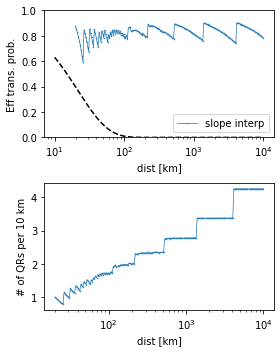

In [798]:

plt.figure(2,figsize=(4,5))
plt.subplot(211)
# plt.plot(d_list,p_opt2,".-",markersize=1,linewidth=0.7,label=r"$\eta_r =%.2f$" % (1-0.05))
# plt.plot(d_list,p_opt,".-",markersize=1,linewidth=0.7,label=r"$\eta_r =%.2f$" % (1-p_r))
# plt.plot(d_list,p_opt2,".-",markersize=1,linewidth=0.7,label="extrapolation interp")
plt.plot(d_list,p_opt,".-",markersize=1,linewidth=0.7,label="slope interp")

x_plot = np.logspace(1,np.log10(np.amax(d_list)),200)
plt.plot(x_plot, 10**(-x_plot/50),"k--")
plt.xscale("log")
plt.ylabel("Eff trans. prob.")
plt.xlabel("dist [km]")
plt.ylim(0,1)
plt.legend()
# plt.show()

# plt.figure(3)
plt.subplot(212)
# plt.plot(d_list,10/(d_list/Nl_opt2),".-",markersize=1,linewidth=0.7)
plt.plot(d_list,10/(d_list/Nl_opt),".-",markersize=1,linewidth=0.7)
plt.xscale("log")
plt.ylabel("# of QRs per 10 km")
plt.xlabel("dist [km]")
plt.tight_layout()
# plt.savefig("figs_Hassan/slope_vs_extrap_cost_%.2f.pdf" % (p_r))
plt.show()

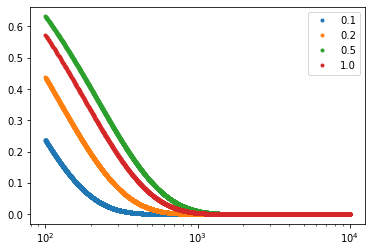

In [293]:
for dist in np.array([0.1,0.2,0.5,1]):
    p_val = 1-(1-p_r)*10**(-dist/50)
    slope_val = np.interp(p_val,p_list[ind_p_list], slope)
    intercept_val = np.interp(p_val,p_list[ind_p_list], intercept)
    Nl_max = 1e4 /dist
    Nl_min = 1e2 /dist
    Nl_sw = np.arange(Nl_min,Nl_max)
    # print(slope_val)
    p_eff = np.exp(0*intercept_val+slope_val*Nl_sw)   
    plt.plot(Nl_sw*dist,p_eff,".",label="%.1f" % dist)
plt.xscale("log")
# plt.yscale("log")
plt.legend()
plt.show()

## 7qubit

In [722]:
def file_reader(fname_in,repeat):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d.npz" % (i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
    if not first:    
        return succ_prob_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0
    
def file_reader_large_sample(fname_in,repeat):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d.npz" % (i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = np.zeros(len(p_list))
            if i_rep<100:
                succ_prob_avg += succ_prob*Nrep
                Ntot += Nrep
            else:
                succ_prob_avg[11:15] += succ_prob[11:15]*Nrep
                Ntot[11:15] += Nrep
                
    if not first:    
        return succ_prob_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0

In [864]:
repeat = 500
p_r = 0.1
Nl_list = np.arange(2,30,2)
ind_p_list = np.arange(0,15,1)#[8,11,14]
# ind_p_list = [8]
succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))

# plt.figure(1,figsize=(6,4))
bdy = True
for i_L, Nl in enumerate(Nl_list):
    # print(Nl)
    f1 = "data_7q/" + "even_Nl_%d" % (Nl)
    succ_prob_even, p_list_even, Ntot_even = file_reader(f1,repeat) 
    succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)]

    
    f2 = "data_7q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    # succ_prob_odd, p_list, Ntot = file_reader(f2,repeat) 
    succ_prob_odd, p_list, Ntot = file_reader_large_sample(f2,repeat) 
    succ_prob_avg[:,i_L] = succ_prob_odd[ind_p_list]*succ_prob_repeater
    

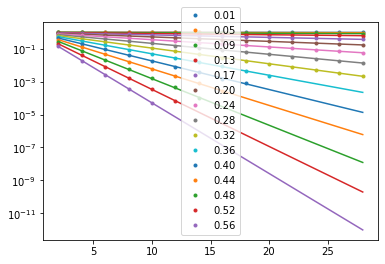

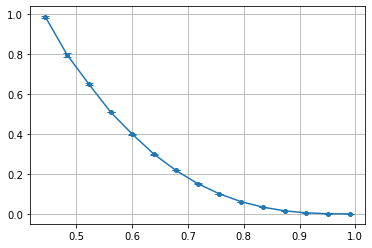

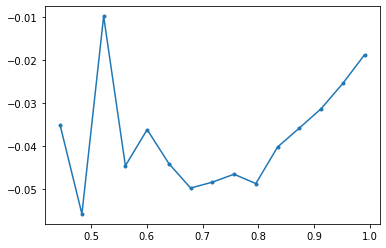

In [865]:

slope = np.zeros(len(ind_p_list))
intercept = np.zeros(len(ind_p_list))
std_err = np.zeros(len(ind_p_list))

for i_p, ind_p in enumerate(ind_p_list):
    if i_p>= 9:
        i_N = np.arange(len(ind_p_list)-i_p+4)
    else:
        i_N = np.arange(len(ind_p_list)-1)
    i_s = np.argwhere(succ_prob_avg[i_p,i_N]>0)[:,0]
    slope[i_p], intercept[i_p], r_value, p_value, std_err[i_p] = linregress(Nl_list[i_s], np.log(succ_prob_avg[i_p,i_s]))
    plt.figure(1)
    plt.plot(Nl_list[i_N],succ_prob_avg[i_p,i_N],".",color="C%d" % i_p,label="%.2f" % p_list[ind_p])
    plt.plot(Nl_list, np.exp(intercept[i_p]+slope[i_p]*Nl_list),color="C%d" % i_p)
plt.yscale("log")
plt.legend()

plt.figure(2)
plt.errorbar(1-p_list[ind_p_list],-slope,std_err,marker=".",markersize=8,capsize=4)
# plt.ylim(-0.001,0.01)
plt.grid()

plt.figure(3)
plt.plot(1-p_list[ind_p_list],intercept,".-")

## slope plot

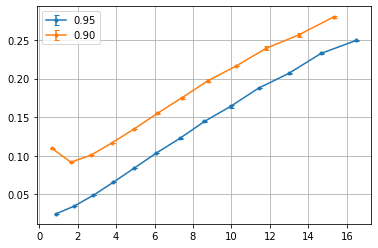

In [898]:
repeat = 500
pr_list = [0.05,0.1]
Nl_list = np.arange(2,31,2)
ind_p_list = np.arange(0,15,1)#
# ind_p_list = [8]

# plt.figure(1,figsize=(6,4))
bdy = True
for p_r in pr_list:
    succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))
    for i_L, Nl in enumerate(Nl_list):
        # print(Nl)
        f1 = "data_7q/" + "even_Nl_%d" % (Nl)
        succ_prob_even, p_list_even, Ntot_even = file_reader(f1,100) 
        succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)]


        f2 = "data_7q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
        succ_prob_odd, p_list, Ntot = file_reader_large_sample(f2,repeat) 
        succ_prob_avg[:,i_L] = succ_prob_odd[ind_p_list]*succ_prob_repeater


    slope = np.zeros(len(ind_p_list))
    intercept = np.zeros(len(ind_p_list))
    std_err = np.zeros(len(ind_p_list))

    for i_p, ind_p in enumerate(ind_p_list):
        if i_p>= 9:
            i_N = np.arange(len(ind_p_list)-i_p+4)
        else:
            i_N = np.arange(len(ind_p_list)-1)
        i_s = np.argwhere(succ_prob_avg[i_p,i_N]>0)[:,0]
        slope[i_p], intercept[i_p], r_value, p_value, std_err[i_p] = linregress(Nl_list[i_s], np.log10(succ_prob_avg[i_p,i_s]))

    slope_dB = 0.2*slope/np.log10((1-p_list[ind_p_list])/(1-p_r))
    std_err_dB = -0.2*std_err/np.log10((1-p_list[ind_p_list])/(1-p_r))
    unit_dist = -50*np.log10((1-p_list[ind_p_list])/(1-p_r))
    inds = np.argwhere(unit_dist>0)[:,0]
    plt.figure(2)
    plt.errorbar(unit_dist[inds],slope_dB[inds],std_err_dB[inds],marker=".",markersize=6,capsize=2.5,label="%.2f" % (1-p_r))
    # plt.errorbar(p_list[ind_p_list][inds],slope_dB[inds],std_err_dB[inds],marker=".",markersize=8,capsize=4,label="%.2f" % (1-p_r))
    # plt.errorbar(p_list[ind_p_list],slope_dB,std_err_dB,marker=".",markersize=8,capsize=4,label="%.2f" % (1-p_r))

    # plt.ylim(-0.001,0.01)
plt.grid()
plt.legend()

In [757]:
unit_dist[inds]

array([ 0.88393218,  1.83154101,  2.82239698,  3.8606371 ,  4.95102191,
        6.09906752,  7.31121444,  8.59504642,  9.95957809, 11.41563934,
       12.97639789, 14.65808474, 16.48102486])

In [861]:
slope_dB[inds]

array([0.10969689, 0.09183116, 0.10071395, 0.11661599, 0.13457076,
       0.15478321, 0.17507125, 0.19733442, 0.21614293, 0.23918137,
       0.25630833, 0.27964879])

In [862]:
std_err_dB[inds]

array([0.00036892, 0.00024764, 0.00026812, 0.00019903, 0.00047917,
       0.00042524, 0.0010102 , 0.00171913, 0.0002881 , 0.00246057,
       0.00259865, 0.00097702])

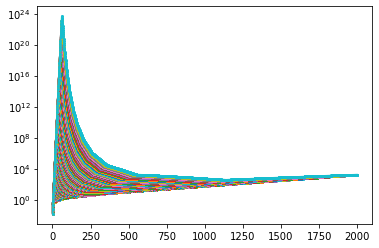

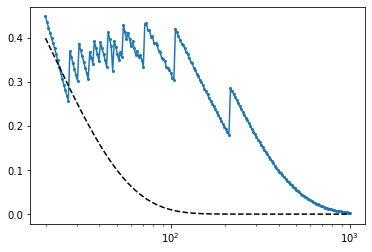

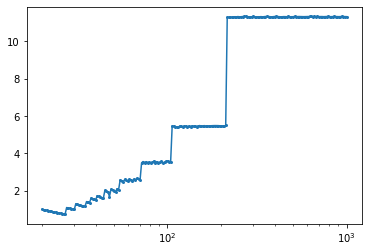

In [856]:
d_list = np.logspace(1.3,3,200)
cost = np.zeros((len(ind_p_list),len(d_list)))
unit_dist = np.zeros(len(ind_p_list))

Nl_opt = np.zeros(len(d_list))
p_opt = np.zeros(len(d_list))

for i_d, d_tot in enumerate(d_list):
    # print(d_tot)
    N_sw = np.arange(2,d_tot*2)
    cost = np.zeros(len(N_sw))
    p_eff = np.zeros(len(N_sw))
    p_val = 1-(1-p_r)*10**(-0.02*d_tot/N_sw)
    # if Nl== 2000:
    #     print(1-p_val)
    slope_val = np.interp(p_val,p_list[ind_p_list], slope)
    intercept_val = np.interp(p_val,p_list[ind_p_list], intercept)
    for i_N, Nl in enumerate(N_sw):
        p_eff[i_N] = np.exp(intercept_val[i_N]+slope_val[i_N]*Nl)
        cost[i_N] = Nl/d_tot/p_eff[i_N]
        
    plt.figure(1)
    plt.plot(N_sw,cost,".-",label="%d" % d_tot,markersize=4)
    # plt.ylim(1e50,1e200)
    plt.yscale("log")

    # i_1 = np.argsort(cost)
    # if p_eff[i_1[0]]> p_eff[i_1[1]]:
    #     Nl_opt[i_d] = N_sw[i_1[0]]
    #     p_opt[i_d] = p_eff[i_1[0]]
    # else:
    #     Nl_opt[i_d] = N_sw[i_1[1]]
    #     p_opt[i_d] = p_eff[i_1[1]]
    i_1 = len(N_sw)-1-np.argwhere(np.diff(cost[::-1])>0)
    if len(i_1)>0:
        Nl_opt[i_d] = N_sw[i_1[0,0]]
        p_opt[i_d] = p_eff[i_1[0,0]]
    else:
        Nl_opt[i_d] = N_sw[0]
        p_opt[i_d] = p_eff[0]

# plt.legend()
# # plt.xlim()
# # plt.xlabel("QR dist[km]")
# plt.show()

plt.figure(2)
plt.plot(d_list,p_opt,".-",markersize=4)
plt.plot(d_list, 10**(-d_list/50),"k--")
plt.xscale("log")
# plt.ylim(0,1)
plt.show()

plt.figure(3)
plt.plot(d_list,10/(d_list/Nl_opt),".-",markersize=4)
plt.xscale("log")
plt.show()

In [765]:
p_opt2 = p_opt
Nl_opt2 = Nl_opt

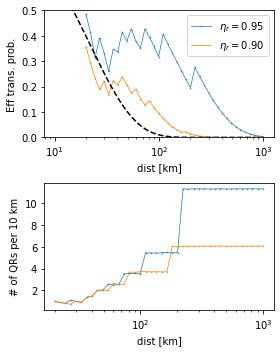

In [771]:

plt.figure(2,figsize=(4,5))
plt.subplot(211)
plt.plot(d_list,p_opt2,".-",markersize=1,linewidth=0.7,label=r"$\eta_r =%.2f$" % (1-0.05))
plt.plot(d_list,p_opt,".-",markersize=1,linewidth=0.7,label=r"$\eta_r =%.2f$" % (1-p_r))
# plt.plot(d_list,p_opt2,".-",markersize=1,linewidth=0.7,label="extrapolation interp")
# plt.plot(d_list,p_opt,".-",markersize=1,linewidth=0.7,label="slope interp")

x_plot = np.logspace(1,np.log10(np.amax(d_list)),200)
plt.plot(x_plot, 10**(-x_plot/50),"k--")
plt.xscale("log")
plt.ylabel("Eff trans. prob.")
plt.xlabel("dist [km]")
plt.ylim(0,0.5)
plt.legend()
# plt.show()

# plt.figure(3)
plt.subplot(212)
plt.plot(d_list,10/(d_list/Nl_opt2),".-",markersize=1,linewidth=0.7)
plt.plot(d_list,10/(d_list/Nl_opt),".-",markersize=1,linewidth=0.7)
plt.xscale("log")
plt.ylabel("# of QRs per 10 km")
plt.xlabel("dist [km]")
plt.tight_layout()
# plt.savefig("figs_Hassan/slope_vs_extrap_cost_%.2f.pdf" % (p_r))
plt.show()

## Comparison with Borregaard's paper

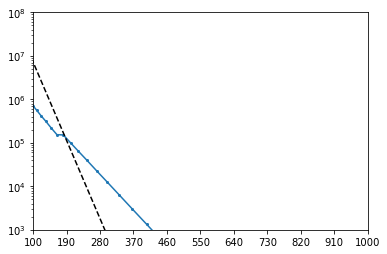

In [785]:

# d_list = np.linspace(1e2,1e3,100)
τ = 2e-9
plt.figure(2)
plt.plot(d_list,-np.log2(1-p_opt)/(100*τ),".-",markersize=4)
plt.plot(d_list,-np.log2(1-10**(-d_list/50))/τ,"k--")
plt.yscale("log")
plt.ylim(1e3,1e8)
plt.xticks(np.linspace(1e2,1e3,11))
plt.xlim(1e2,1e3)
plt.show()

In [790]:
h = lambda x: -x*np.log2(x)-(1-x)*np.log2(1-x)
ϵr = 1e-3
m = 10
ϵtrans = (m+1)*ϵr
Q =2*ϵtrans/3
f = 1 - h(Q) - Q - (1-Q)*h((1-3*Q/2)/(1-Q))
print(f)

0.8952134925757508


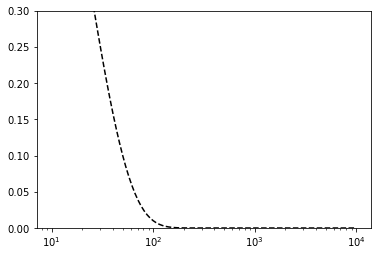

In [787]:
# d_list = np.linspace(1e2,1e3,100)
x_plot = np.logspace(1,4,100)
τ = 1#2e-9
plt.figure(2)
# plt.plot(d_list,-np.log2(1-p_opt)/(100*τ),".-",markersize=4)
# plt.plot(d_list,-np.log2(1-10**(-d_list/50))/τ,"k--")
plt.plot(x_plot,10**(-x_plot/50),"k--")
# plt.yscale("log")
plt.ylim(0,0.3)
# plt.xticks(np.linspace(1e2,1e3,11))
# plt.xlim(1e2,1e3)
plt.xscale("log")
plt.show()